# Heart Health Prediction

#### Importing Data form heart.csv

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
df=pd.read_csv('heart.csv')

df

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,Target
0,63,1,typical,145,233,1,2,150,0,2.3,3,0,fixed,0
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3,normal,1
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2,reversable,1
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0,normal,0
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,typical,110,264,0,0,132,0,1.2,2,0,reversable,1
299,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2,reversable,1
300,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1,reversable,1
301,57,0,nontypical,130,236,0,2,174,0,0.0,2,1,normal,1


# Data Cleansing 

#### Listing Null Values form data

In [17]:
print(df.isnull().sum())

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           0
Thal         2
Target       0
dtype: int64


###### Droping Null values because Null values are very less as compared to data size

In [18]:
df=df.dropna()

# Data Visualization 

##### Give the info of Data Type

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 301 entries, 0 to 302
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        301 non-null    int64  
 1   Sex        301 non-null    int64  
 2   ChestPain  301 non-null    object 
 3   RestBP     301 non-null    int64  
 4   Chol       301 non-null    int64  
 5   Fbs        301 non-null    int64  
 6   RestECG    301 non-null    int64  
 7   MaxHR      301 non-null    int64  
 8   ExAng      301 non-null    int64  
 9   Oldpeak    301 non-null    float64
 10  Slope      301 non-null    int64  
 11  Ca         301 non-null    int64  
 12  Thal       301 non-null    object 
 13  Target     301 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 35.3+ KB


###### Describing the wohle Data

In [20]:
df.describe()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Target
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.00000,301.000000
mean,54.451827,0.681063,131.714286,246.936877,0.146179,0.990033,149.700997,0.325581,1.043189,1.601329,0.69103,0.458472
std,9.067258,0.466841,17.655729,51.859869,0.353874,0.994937,22.860817,0.469372,1.163384,0.616872,0.94915,0.499102
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.00000,0.000000
25%,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,134.000000,0.000000,0.000000,1.000000,0.00000,0.000000
50%,56.000000,1.000000,130.000000,242.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.00000,0.000000
75%,61.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.00000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.00000,1.000000


##### Pandas Profiling Provide the Report of data set including Corelation

In [21]:
import pandas_profiling
pandas_profiling.ProfileReport(df)

ModuleNotFoundError: No module named 'pandas_profiling'

In [ ]:
d=df['Target'].value_counts()
print(d)

0    163
1    138
Name: Target, dtype: int64


##### Heart Diseases Ratio in Dataset
###### Blue Graph indicate no heart desease and Orange Graph show Heart desease

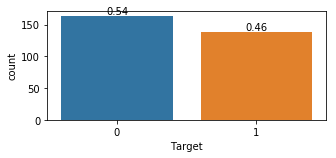

In [ ]:
import seaborn as sns
def plotTarget():
    sns.countplot(x='Target', data=df, ax=ax)
    for i, p in enumerate(ax.patches):
        count=df['Target'].value_counts().values[i]
        x=p.get_x()+ p.get_width() /2.
        y=p.get_height() + 3
        label='{:1.2f}'.format(count / float(df.shape[0]))
        ax.text(x, y,label, ha='center')
        
fig_target,ax=plt.subplots(nrows=1, ncols=1, figsize=(5, 2))
plotTarget()

##### Checking the corelation of data

In [ ]:
df.corr()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Target
Age,1.000000,-0.098138,0.284734,0.208287,0.121670,0.149037,-0.395982,0.092985,0.203604,0.162228,0.331939,0.224394
Sex,-0.098138,1.000000,-0.065284,-0.202126,0.041025,0.029016,-0.057065,0.140802,0.098482,0.031571,0.100345,0.272006
RestBP,0.284734,-0.065284,1.000000,0.129371,0.178498,0.147089,-0.046402,0.065564,0.188801,0.117437,0.100535,0.151471
Chol,0.208287,-0.202126,0.129371,1.000000,0.015762,0.171185,-0.005690,0.064250,0.044836,-0.004228,0.106125,0.086762
Fbs,0.121670,0.041025,0.178498,0.015762,1.000000,0.079892,-0.012297,0.013534,0.004855,0.054079,0.164689,0.015613
RestECG,0.149037,0.029016,0.147089,0.171185,0.079892,1.000000,-0.077950,0.092626,0.117580,0.140144,0.127330,0.177049
MaxHR,-0.395982,-0.057065,-0.046402,-0.005690,-0.012297,-0.077950,1.000000,-0.386043,-0.349391,-0.393527,-0.256365,-0.425870
ExAng,0.092985,0.140802,0.065564,0.064250,0.013534,0.092626,-0.386043,1.000000,0.287926,0.254076,0.151731,0.427860
Oldpeak,0.203604,0.098482,0.188801,0.044836,0.004855,0.117580,-0.349391,0.287926,1.000000,0.576795,0.274451,0.423894
Slope,0.162228,0.031571,0.117437,-0.004228,0.054079,0.140144,-0.393527,0.254076,0.576795,1.000000,0.102041,0.335806


##### Select Age as most dependent data on label 
###### Disease Probability Bar Plot

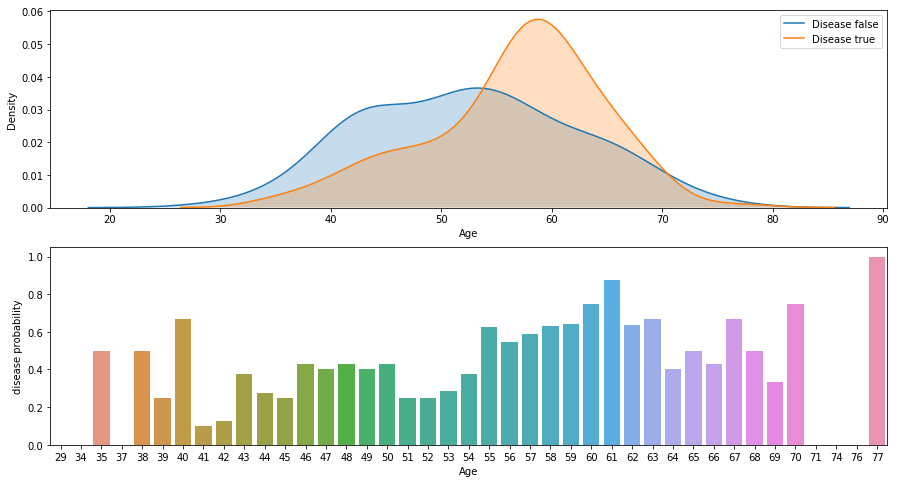

<Figure size 216x216 with 0 Axes>

In [ ]:
def plotAge():
    facet_grid = sns.FacetGrid(df, hue='Target')
    facet_grid.map(sns.kdeplot, "Age", shade=True, ax=axes[0])
    legend_labels = ['Disease false', 'Disease true']
    for t, l in zip(axes[0].get_legend().texts, legend_labels):
        t.set_text(l)
        axes[0].set(xlabel='Age', ylabel='Density')

    avg = df[["Age", "Target"]].groupby(['Age'], as_index=False).mean()
    sns.barplot(x='Age', y='Target', data=avg, ax=axes[1])
    axes[1].set(xlabel='Age', ylabel='disease probability')

    plt.clf()

fig_age, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 8))
plotAge()


###### Checking For Categorical Data

In [ ]:
x=df['ChestPain']
x.value_counts()

asymptomatic    143
nonanginal       85
nontypical       50
typical          23
Name: ChestPain, dtype: int64

In [ ]:
x=df['Thal']
x.value_counts()

normal        166
reversable    117
fixed          18
Name: Thal, dtype: int64

##### Ploting Function For Categorical Data " Chest Pain" && "Thalassemia"
##### Ploting Function For Continoius Data

In [ ]:
import seaborn as sns
category=[('ChestPain', ['typical','nontypical','nonanginal','asymptomatic']),('Thal',['fixed','normal','reversable',])]
continuous = [('Age', 'Age in year'),
              ('Sex','1 for Male 0 for Female'),
              ('RestBP','BP in Rest State'),
              ('Fbs','Fasting blood glucose'),
              ('RestECG','ECG at rest'),
              ('Chol', 'serum cholestoral in mg/d'),
              ('MaxHR','Max Heart Rate'),
              ('ExAng','Exchange Rate'),
              ('Slope','Slope of Curve'),
              ('Oldpeak', 'ST depression by exercise relative to rest'), 
              ('Ca', '# major vessels: (0-3) colored by flourosopy')]

        
def plotCategorial(attribute, labels, ax_index):
    sns.countplot(x=attribute, data=df, ax=axes[ax_index][0])
    sns.countplot(x='Target', hue=attribute, data=df, ax=axes[ax_index][1])
    avg = df[[attribute, 'Target']].groupby([attribute], as_index=False).mean()
    sns.barplot(x=attribute, y='Target', hue=attribute, data=avg, ax=axes[ax_index][2])
    
    for t, l in zip(axes[ax_index][1].get_legend().texts, labels):
        t.set_text(l)
    for t, l in zip(axes[ax_index][2].get_legend().texts, labels):
        t.set_text(l)


def plotContinuous(attribute, xlabel, ax_index):
    sns.distplot(df[[attribute]], ax=axes[ax_index][0])
    axes[ax_index][0].set(xlabel=xlabel, ylabel='density')
    sns.violinplot(x='Target', y=attribute, data=df, ax=axes[ax_index][1])
    
    
def plotGrid(isCategorial):
    if isCategorial:
        [plotCategorial(x[0], x[1], i) for i, x in enumerate(category)] 
    else:
        [plotContinuous(x[0], x[1], i) for i, x in enumerate(continuous)]

##### Categorical Plot

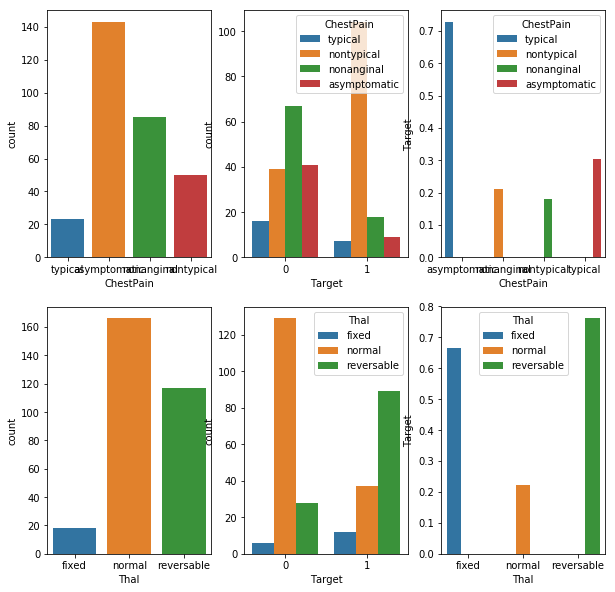

In [ ]:
fig_categorial,axes=plt.subplots(nrows=len(category), ncols=3, figsize=(10, 10))
plotGrid(isCategorial=True)

##### Continuous Plot

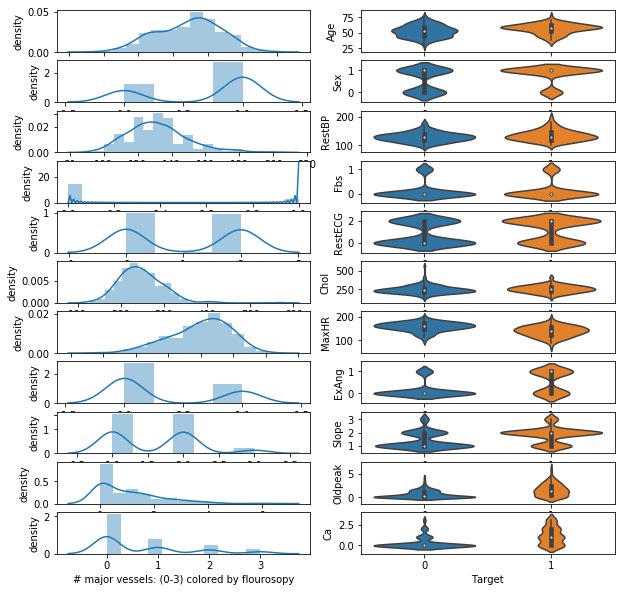

In [ ]:
fig_continuous, axes = plt.subplots(nrows=len(continuous), ncols=2, figsize=(10,10))
plotGrid(isCategorial=False)

##### Creating Dummy

In [ ]:
#dummy for chest Pain
chestpain_dummy = pd.get_dummies(df.loc[:,'ChestPain'])
chestpain_dummy.rename(columns={1: 'Typical', 2: 'Asymptomatic',3: 'Nonanginal', 4: 'Nontypical'}, inplace=True)
#dummy for RestECG
restecg_dummy = pd.get_dummies(df.loc[:,'RestECG'])
restecg_dummy.rename(columns={0: 'Normal_restECG', 1: 'Wave_abnormal_restECG',2:'Ventricular_ht_restECG'},inplace=True)
#dummy for Slope
slope_dummy = pd.get_dummies(df['Slope'])
slope_dummy.rename(columns={1: 'Slope_upsloping', 2:'Slope_flat',3: 'Slope_downsloping'},inplace=True)
#dummy for Thal
thal_dummy = pd.get_dummies(df['Thal'])
thal_dummy.rename(columns={3: 'Thal_Normal', 6: 'Thal_fixed',7: 'Thal_reversible'}, inplace=True)
#concatination in data frame
df = pd.concat([df,chestpain_dummy, restecg_dummy, slope_dummy, thal_dummy], axis=1)
#droping Column because their dummies are created
df.drop(['ChestPain','RestECG', 'Slope', 'Thal'], axis=1, inplace=True)

##### Checking the No object will left 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301 entries, 0 to 302
Data columns (total 23 columns):
Age                       301 non-null int64
Sex                       301 non-null int64
RestBP                    301 non-null int64
Chol                      301 non-null int64
Fbs                       301 non-null int64
MaxHR                     301 non-null int64
ExAng                     301 non-null int64
Oldpeak                   301 non-null float64
Ca                        301 non-null int64
Target                    301 non-null int64
asymptomatic              301 non-null uint8
nonanginal                301 non-null uint8
nontypical                301 non-null uint8
typical                   301 non-null uint8
Normal_restECG            301 non-null uint8
Wave_abnormal_restECG     301 non-null uint8
Ventricular_ht_restECG    301 non-null uint8
Slope_upsloping           301 non-null uint8
Slope_flat                301 non-null uint8
Slope_downsloping         301 non-null

##### Checking dataset

In [ ]:
df.head()

,Age,Sex,RestBP,Chol,Fbs,MaxHR,ExAng,Oldpeak,Ca,Target,...,typical,Normal_restECG,Wave_abnormal_restECG,Ventricular_ht_restECG,Slope_upsloping,Slope_flat,Slope_downsloping,fixed,normal,reversable
0,63,1,145,233,1,150,0,2.3,0,0,...,1,0,0,1,0,0,1,1,0,0
1,67,1,160,286,0,108,1,1.5,3,1,...,0,0,0,1,0,1,0,0,1,0
2,67,1,120,229,0,129,1,2.6,2,1,...,0,0,0,1,0,1,0,0,0,1
3,37,1,130,250,0,187,0,3.5,0,0,...,0,1,0,0,0,0,1,0,1,0
4,41,0,130,204,0,172,0,1.4,0,0,...,0,0,0,1,1,0,0,0,1,0


##### Selecting label means selected Column to predict in df_X and input column in df_y

In [ ]:
df_X= df.loc[:, df.columns != 'Target']
df_y= df.loc[:, df.columns == 'Target']

# Model Training 

#### Recursive Feature Elimination

In [ ]:
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
selected_features=[]
lr=LogisticRegression()
rfe=RFE(lr,20)

warnings.simplefilter('ignore')
rfe.fit(df_X.values,df_y.values)
print(rfe.support_)
print(rfe.ranking_)

for i, feature in enumerate(df_X.columns.values):
    if rfe.support_[i]:
        selected_features.append(feature)

df_selected_X = df_X[selected_features]
df_selected_y=df_y

lm=sm.Logit(df_selected_y,df_selected_X)
result = lm.fit()

print(result.summary2())
warnings.simplefilter('ignore')

[False  True  True False  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True]
[2 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Optimization terminated successfully.
         Current function value: 0.325026
         Iterations 10
                           Results: Logit
Model:                Logit             Pseudo R-squared:  0.529     
Dependent Variable:   Target            AIC:               229.6658  
Date:                 2019-05-06 12:38  BIC:               292.6867  
No. Observations:     301               Log-Likelihood:    -97.833   
Df Model:             16                LL-Null:           -207.60   
Df Residuals:         284               LLR p-value:       8.6861e-38
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       10.0000                                        
---------------------------------------------------------------------
                        Coef.  Std.Err.    z

##### Spliting Values into test and traning Dataset in the ratio 0.75:0.25

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test=train_test_split(df_selected_X,df_selected_y, test_size = 0.25, random_state =0)
columns = X_train.columns

##### Calculating Accuracy Function of the Models

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
def cal_accuracy(y_test, y_predict): 
    
    print("\nConfusion Matrix: \n", 
    confusion_matrix(y_test, y_predict)) 
      
    print (f"\nAccuracy : {accuracy_score(y_test,y_predict)*100:0.3f}")

# Logistic Regression

In [ ]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_predict=lr.predict(X_test)
print(f"Accuracy of Test Dataset: {lr.score(X_test,y_test):0.3f}")
print(f"Accuracy of Train Dataset: {lr.score(X_train,y_train):0.3f}")
warnings.simplefilter('ignore')

Accuracy of Test Dataset: 0.855
Accuracy of Train Dataset: 0.853


##### Vale Prediction for Test dataset for Logistic Regression

In [ ]:
print("Predicted values:") 
print(y_predict)
cal_accuracy(y_test, y_predict)

Predicted values:
[1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 1 1 1 0 0 0 1 0 0 1
 0 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 1 0 1 0 0 0 1 1 0 1 1 1 1 0 0 0 1
 1 0]

Confusion Matrix: 
 [[36  4]
 [ 7 29]]

Accuracy : 85.526


# Support Vector Machine

In [ ]:
from sklearn import svm
svm_linear = svm.SVC(kernel='linear')
svm_linear.fit(X_train,y_train)
warnings.simplefilter('ignore')
print(f"Accuracy of Test Dataset: {svm_linear.score(X_test,y_test):0.3f}")
print(f"Accuracy of Train Dataset: {svm_linear.score(X_train,y_train):0.3f}")

Accuracy of Test Dataset: 0.855
Accuracy of Train Dataset: 0.880


##### Vale Prediction for Test dataset for SVM

In [ ]:
print("Predicted values:") 
print(y_predict)
cal_accuracy(y_test, y_predict)

Predicted values:
[1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 1 1 1 0 0 0 1 0 0 1
 0 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 1 0 1 0 0 0 1 1 0 1 1 1 1 0 0 0 1
 1 0]

Confusion Matrix: 
 [[36  4]
 [ 7 29]]

Accuracy : 85.526


# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
gini = DecisionTreeClassifier(criterion = "gini", random_state =100,max_depth=3, min_samples_leaf=5)
gini.fit(X_train, y_train)
warnings.simplefilter('ignore')
print(f"Accuracy of Test Dataset: {gini.score(X_test,y_test):0.3f}")
print(f"Accuracy of Train Dataset: {gini.score(X_train,y_train):0.3f}")

Accuracy of Test Dataset: 0.855
Accuracy of Train Dataset: 0.849


##### Vale Prediction for Test dataset for Decision Tree

In [ ]:
y_predict=gini.predict(X_test) 
print("Predicted values:\n")
print(y_predict) 
cal_accuracy(y_test, y_predict)

Predicted values:

[1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 1 0 1 1 1 1 1 0 0 1 0 0 1
 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 0 0 1 0
 0 0]

Confusion Matrix: 
 [[36  4]
 [ 7 29]]

Accuracy : 85.526


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest=RandomForestClassifier(n_estimators=100)
forest.fit(X_train,y_train)

warnings.simplefilter('ignore')
print(f"Accuracy of Test Dataset: {forest.score(X_test,y_test):0.3f}")
print(f"Accuracy of Train Dataset: {forest.score(X_train,y_train):0.3f}")

Accuracy of Test Dataset: 0.882
Accuracy of Train Dataset: 1.000


##### Over Fitting Issue
##### Vale Prediction for Test dataset for Rondom Forest

In [ ]:
y_predict=forest.predict(X_test)
print("Predicted values:\n")
print(y_predict)
cal_accuracy(y_test, y_predict)

Predicted values:

[1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 1 1 1 1 1 1 0 0 0 1 0 0 1
 0 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 0 0 0 1
 1 0]

Confusion Matrix: 
 [[35  5]
 [ 4 32]]

Accuracy : 88.158


# Cross Validation For Models

In [ ]:
from sklearn import model_selection
kfold=model_selection.KFold(n_splits=10, random_state=7)
models=[('Linear Regression', lr), ('Support Vector Machine', svm_linear),('Decision Tree',gini),
        ('Random Forest',forest)]
warnings.simplefilter('ignore')

for model in models:
    results=model_selection.cross_val_score(model[1],X_train,y_train,cv=kfold,scoring='accuracy')
    print(f"Cross validated Accuracy of  {model[0]}:: {results.mean():.3f}")

Cross validated Accuracy of  Linear Regression:: 0.823
Cross validated Accuracy of  Support Vector Machine:: 0.809
Cross validated Accuracy of  Decision Tree:: 0.773
Cross validated Accuracy of  Random Forest:: 0.804


In [ ]:
models=pd.DataFrame({'Model':['Logistics Regression','SVM','Decision Tree','Random Forest'],
                     'Traning Accuracy':[(lr.score(X_train,y_train)),svm_linear.score(X_train,y_train),gini.score(X_train,y_train),forest.score(X_train,y_train)],
                     'Test Accuracy':[(lr.score(X_test,y_test)),svm_linear.score(X_test,y_test),gini.score(X_test,y_test),forest.score(X_test,y_test)]})
models.sort_values(by='Test Accuracy', ascending=False)

,Model,Traning Accuracy,Test Accuracy
3,Random Forest,1.000000,0.881579
0,Logistics Regression,0.853333,0.855263
1,SVM,0.880000,0.855263
2,Decision Tree,0.848889,0.855263


### Best Model for Dataset is Linear Regression